<a href="https://colab.research.google.com/github/MKCA06/Predictive_Time_Forcasting_for_Part_Requests/blob/main/Forecasting_Parts_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score
from scipy import stats


In [ ]:
data=pd.read_excel('G:/Parts_Sales.xlsx')

In [ ]:
data

,REQ NO,REQ DATE,REPORT APPR DATE,PHY SAM DATE,REQUESTEE,REQ DEPT,LOCATION,PART NO,PART NAME,CHILD PART,MODEL,TYPE OF REQ,SUPPLIER NAME,FAILURE MODE,REPORT STATUS,ATCH_REQ_NO,SUB SUPPLIER NAME
0,POL2011422,2020-12-04,2021-04-02,2020-12-04,247758.0,EN-1L,GURGAON FACTORY,38274-55T00,"CAP,WIPER PIVOT","CAP,WIPER PIVOT",YTA,New Development,MITSUBA SICAL INDIA PRIVATE LIMITED,NaN,Accept,NaN,Nandhini Rubber
1,POL2011827,2020-12-16,2021-06-02,2020-12-18,209988.0,EN-1L,GURGAON FACTORY,38400-55T00,"WASHER ASSY, WINDSHIELD",CAP(PP SRM100NC),YTA,New Development,MINDA KYORAKU LTD,NaN,Reject,NaN,MINDA KYORAKU LTD
2,POL2011830,2020-12-16,2021-06-02,2020-12-18,209988.0,EN-1L,GURGAON FACTORY,38400-55T00,"WASHER ASSY, WINDSHIELD","TANK(PP M304), L-JOINT(PP M304)",YTA,New Development,MINDA KYORAKU LTD,NaN,Reject,NaN,minda kyoraku ltd
3,POL2011936,2020-12-19,2021-04-01,2020-12-23,224120.0,QAPQ-M3,MANESAR,82810-69R50,HANDLE ASSY SIDE DOOR,PAINTED PLATES ZYC,YCA MC,New Development,MATE,NaN,Accept,NaN,KNP
4,POL2012046,2020-12-23,2021-04-01,2020-12-24,715938.0,QAPSMG,GUJARAT FACTORY,73821-56R10,GARNISH IP CTR,GARNISH IP CTR/73821-56R10,YSD NB MC,New Development,MATE-SANAND,NaN,Accept,NaN,MATE-SANAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18869,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18870,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18871,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18872,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['REQ DATE'].isnull().sum()

5

In [ ]:
data1=pd.DataFrame()
data1['REQ DATE']=data['REQ DATE'].copy()
data1=data1.dropna()

In [ ]:
data1.sort_values(by='REQ DATE',inplace=True)

In [ ]:
date_counts=data1.groupby('REQ DATE',).size().reset_index(name='Total Orders')
#data1=pd.merge(data1, date_counts,on='REQ DATE')

In [ ]:
date_counts

,REQ DATE,Total Orders
0,2020-12-04,1
1,2020-12-16,2
2,2020-12-19,1
3,2020-12-23,1
4,2020-12-25,1
...,...,...
362,2022-03-26,4
363,2022-03-27,3
364,2022-03-28,15
365,2022-03-29,3


<Axes: xlabel='REQ DATE'>

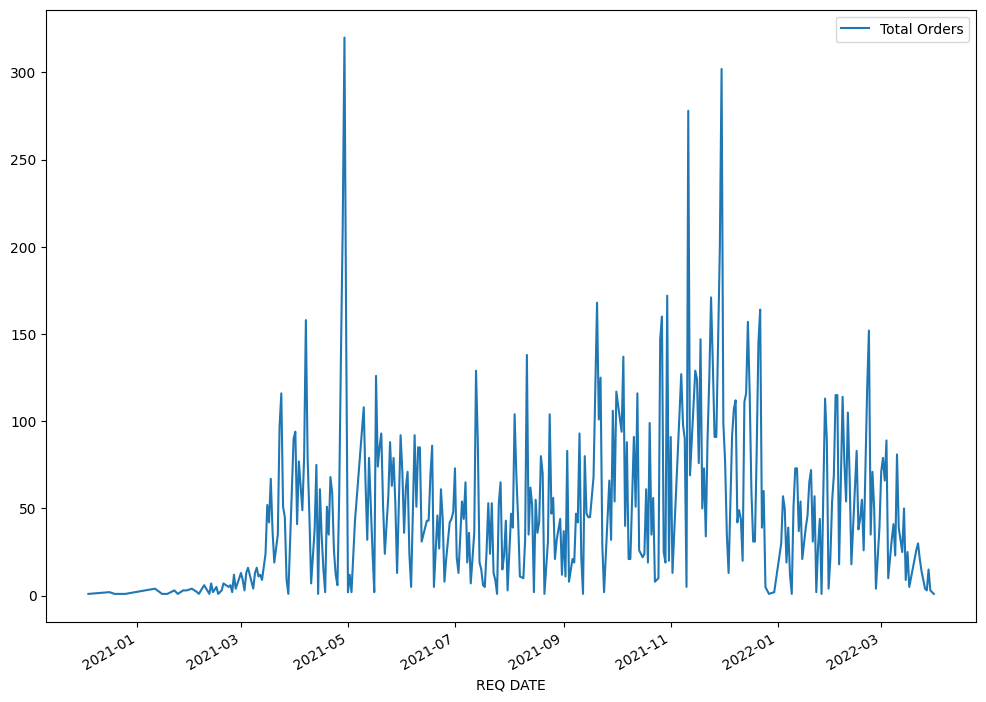

In [ ]:
date_counts.plot('REQ DATE','Total Orders',figsize=(12,9))



In [ ]:
#df['is_sat'] = bool('')
#df['is_sun'] = bool('')
final = pd.DataFrame(columns=['VIN', 'ds', 'yhat'])

data2 = date_counts.rename(columns={'REQ DATE': 'ds', 'Total Orders': 'y'})
m = Prophet(weekly_seasonality=False, yearly_seasonality=True)
    # m.add_seasonality(name='weekly_sat', period=7,
    #                   fourier_order=5, condition_name='is_sat')
    # m.add_seasonality(name='weekly_sun', period=7,
    #                   fourier_order=5, condition_name='is_sun')
    #add_regressor(m, name, prior.scale = NULL, standardize = "auto", mode = NULL)
    #df['is_sat'] = (pd.DatetimeIndex(df['ds']).dayofweek == 2).astype(int)
    #df['is_sun'] = (pd.DatetimeIndex(df['ds']).dayofweek == 3).astype(int)
m.fit(data2)
future = m.make_future_dataframe(periods=100)
    # future['is_sat'] = bool('')
    # future['is_sun'] = bool('')
forecast = m.predict(future)

final = pd.concat([final, forecast], ignore_index=True)
    # print(forecast.tail())
final2 = final[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper']]
final2[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)


17:38:09 - cmdstanpy - INFO - Chain [1] start processing
17:38:09 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2020-12-04,67.443038,15.740693,122.681626
1,2020-12-16,39.502805,-9.533792,93.779909
2,2020-12-19,31.118820,-20.154135,86.245043
3,2020-12-23,20.760833,-30.544064,77.402405
4,2020-12-25,16.314267,-40.998009,67.820330
5,2021-01-11,6.915515,-42.344009,58.642304
6,2021-01-15,9.529145,-44.941510,66.206334
7,2021-01-18,11.651343,-41.737476,67.332512
8,2021-01-22,14.416202,-40.518539,66.778886
9,2021-01-24,15.757687,-39.369038,68.089325


In [ ]:
data2.head(10)

,ds,y
0,2020-12-04,1
1,2020-12-16,2
2,2020-12-19,1
3,2020-12-23,1
4,2020-12-25,1
5,2021-01-11,4
6,2021-01-15,1
7,2021-01-18,1
8,2021-01-22,3
9,2021-01-24,1


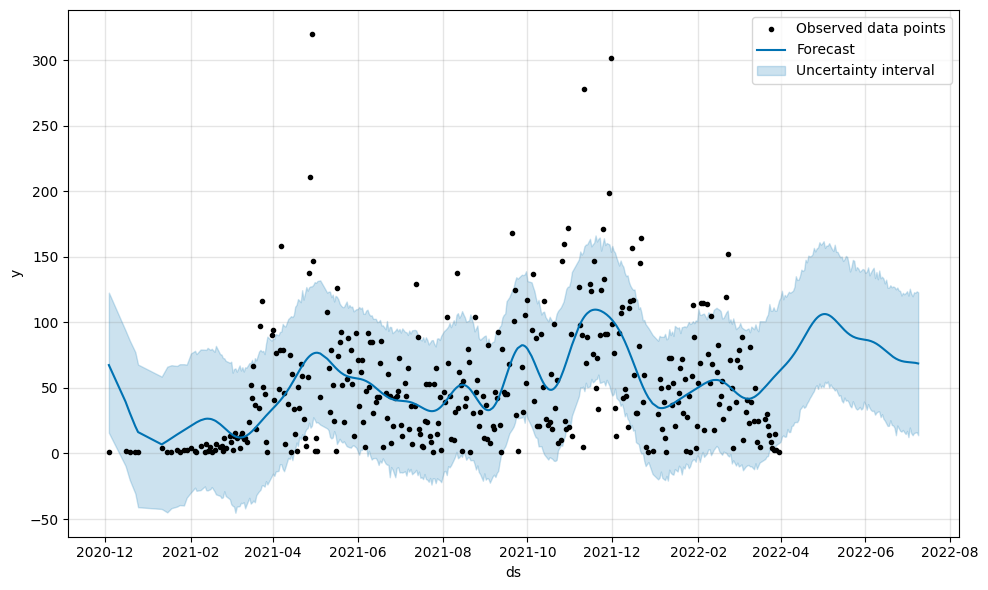

In [ ]:
fig1 = m.plot(final2, uncertainty=True,include_legend=True)


In [ ]:
data3=data2[data2['ds']>'2021-3-30']

In [ ]:
data3.reset_index(inplace=True)
data3.drop('index',axis=1,inplace=True)

C:\Users\intern_asharma\AppData\Local\Temp\ipykernel_2272\413488952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop('index',axis=1,inplace=True)


In [ ]:
#df['is_sat'] = bool('')
#df['is_sun'] = bool('')
data5 = data3[0:214]
data6 = data3[215:314]
final3 = pd.DataFrame(columns=['ds', 'yhat'])
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
    # m.add_seasonality(name='weekly_sat', period=7,
    #                   fourier_order=5, condition_name='is_sat')
    # m.add_seasonality(name='weekly_sun', period=7,
    #                   fourier_order=5, condition_name='is_sun')
    #add_regressor(m, name, prior.scale = NULL, standardize = "auto", mode = NULL)
    #df['is_sat'] = (pd.DatetimeIndex(df['ds']).dayofweek == 2).astype(int)
    #df['is_sun'] = (pd.DatetimeIndex(df['ds']).dayofweek == 3).astype(int)
m.fit(data5)
future2 = m.make_future_dataframe(periods=100)
    # future['is_sat'] = bool('')
    # future['is_sun'] = bool('')
forecast2 = m.predict(future2)

final3 = pd.concat([final3, forecast2], ignore_index=True)
    # print(forecast.tail())
final4 = final3[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper']]
final4[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

17:38:11 - cmdstanpy - INFO - Chain [1] start processing
17:38:11 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2021-03-31,104.578228,49.736055,160.377925
1,2021-04-01,99.531064,48.857541,150.770690
2,2021-04-02,71.268736,10.324301,122.133362
3,2021-04-03,47.466130,-4.527244,98.999436
4,2021-04-05,69.428681,19.131281,124.777855
5,2021-04-06,74.650861,19.398857,123.922478
6,2021-04-07,69.616034,22.359128,121.633650
7,2021-04-08,66.078025,13.952248,118.901987
8,2021-04-09,39.999600,-7.946352,92.395486
9,2021-04-10,19.004178,-35.598462,71.110335


In [ ]:
data3.head(10)

,ds,y
0,2021-03-31,90
1,2021-04-01,94
2,2021-04-02,41
3,2021-04-03,77
4,2021-04-05,49
5,2021-04-06,79
6,2021-04-07,158
7,2021-04-08,79
8,2021-04-09,46
9,2021-04-10,7


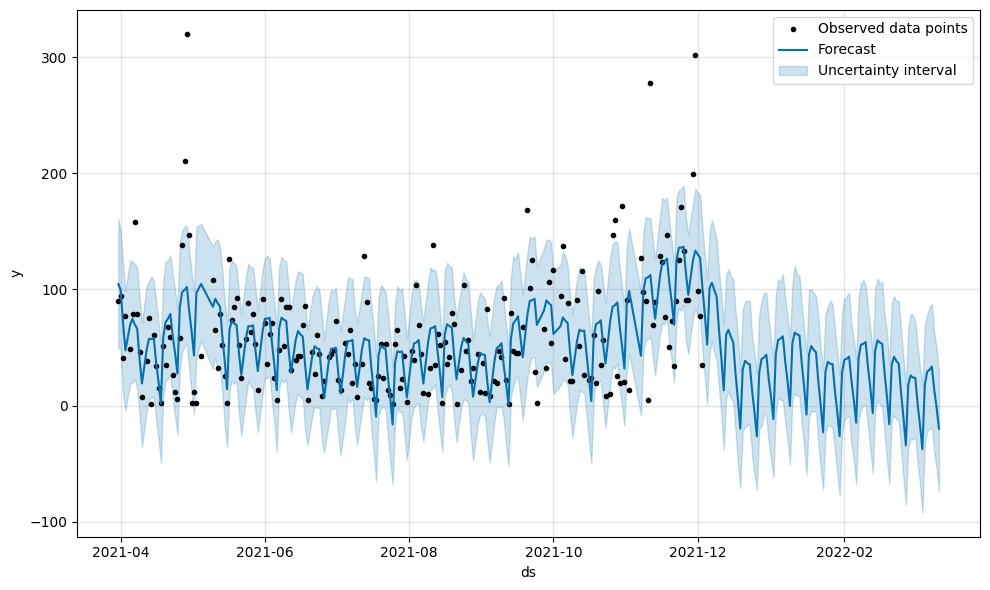

In [ ]:
fig1 = m.plot(final4, uncertainty=True,include_legend=True)


In [ ]:
final5=final4[215:314]
s = r2_score(data6.y, final5.yhat)

In [ ]:
s

-0.43244132488893694

In [ ]:
final5.yhat

215     52.455682
216    101.142061
217    105.735934
218     99.358760
219     93.758032
          ...    
309     30.683546
310     33.538721
311     13.549130
312     -1.801162
313    -20.030041
Name: yhat, Length: 99, dtype: float64

In [ ]:
data6.y

215     92
216    107
217    112
218     42
219     49
      ... 
309      4
310      3
311     15
312      3
313      1
Name: y, Length: 99, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print(mean_squared_error(data6['y'], final5['yhat']) ) # MSE


print(mean_absolute_percentage_error(data6['y'], final5['yhat']))

2209.616377595438
2.1112164144626844


Weekwise

In [ ]:
df=data3.copy()

In [ ]:
df=df.groupby(pd.Grouper(key='ds', axis=0,
                      freq='W')).sum()
df.reset_index(inplace=True)


In [ ]:
df.head()

,ds,y
0,2021-04-04,302
1,2021-04-11,418
2,2021-04-18,226
3,2021-04-25,257
4,2021-05-02,888


<Axes: xlabel='ds'>

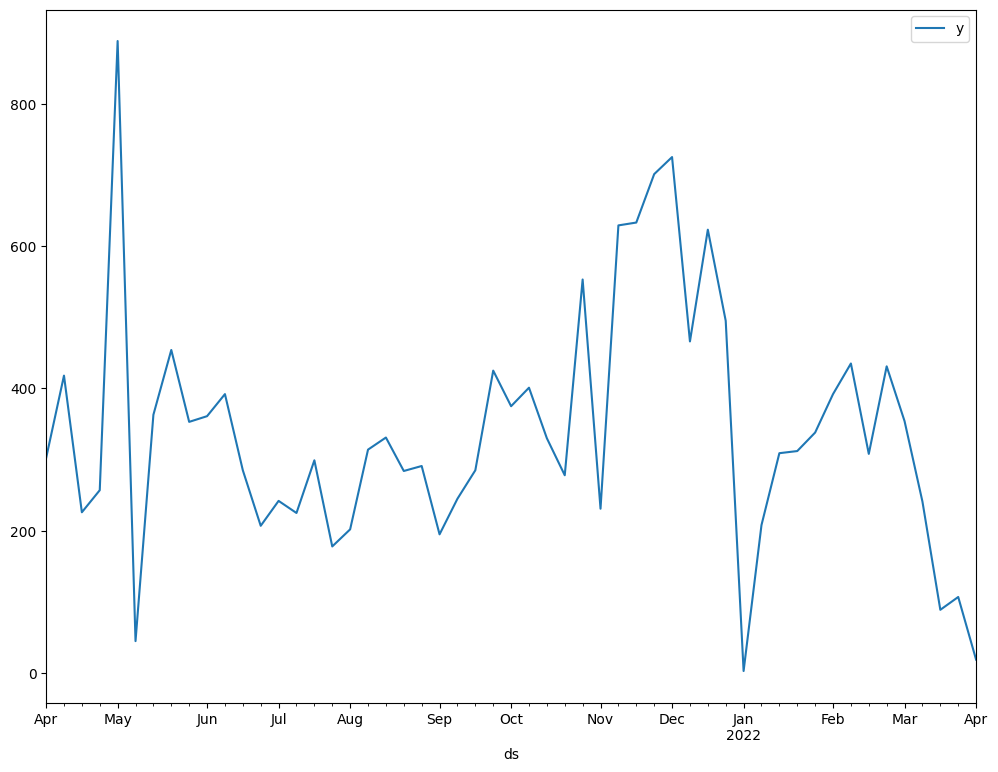

In [ ]:
df.plot('ds','y',figsize=(12,9))

In [ ]:
#df['is_sat'] = bool('')
#df['is_sun'] = bool('')
df2 = df[0:40]
df3 = df[41:52]
final5 = pd.DataFrame(columns=['ds', 'yhat'])
m3 = Prophet()
    # m.add_seasonality(name='weekly_sat', period=7,
    #                   fourier_order=5, condition_name='is_sat')
    # m.add_seasonality(name='weekly_sun', period=7,
    #                   fourier_order=5, condition_name='is_sun')
    #add_regressor(m, name, prior.scale = NULL, standardize = "auto", mode = NULL)
    #df['is_sat'] = (pd.DatetimeIndex(df['ds']).dayofweek == 2).astype(int)
    #df['is_sun'] = (pd.DatetimeIndex(df['ds']).dayofweek == 3).astype(int)
m3.fit(df2)
future3 = m3.make_future_dataframe(periods=15,freq='W')
    # future['is_sat'] = bool('')
    # future['is_sun'] = bool('')
forecast3 = m3.predict(future3)

final5 = pd.concat([final5, forecast3], ignore_index=True)
    # print(forecast.tail())
final6 = final5[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper']]
final6[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)


17:38:13 - cmdstanpy - INFO - Chain [1] start processing
17:38:13 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2021-04-04,281.016480,63.834794,486.012179
1,2021-04-11,285.238328,68.294369,513.436748
2,2021-04-18,289.460176,93.362317,511.534366
3,2021-04-25,293.682024,74.279383,513.103328
4,2021-05-02,297.903872,66.455041,518.262877
5,2021-05-09,302.125720,91.612909,502.693596
6,2021-05-16,306.347568,83.872826,527.268160
7,2021-05-23,310.569416,88.864507,528.632315
8,2021-05-30,314.791264,88.717630,530.665289
9,2021-06-06,319.013112,102.516102,534.781546


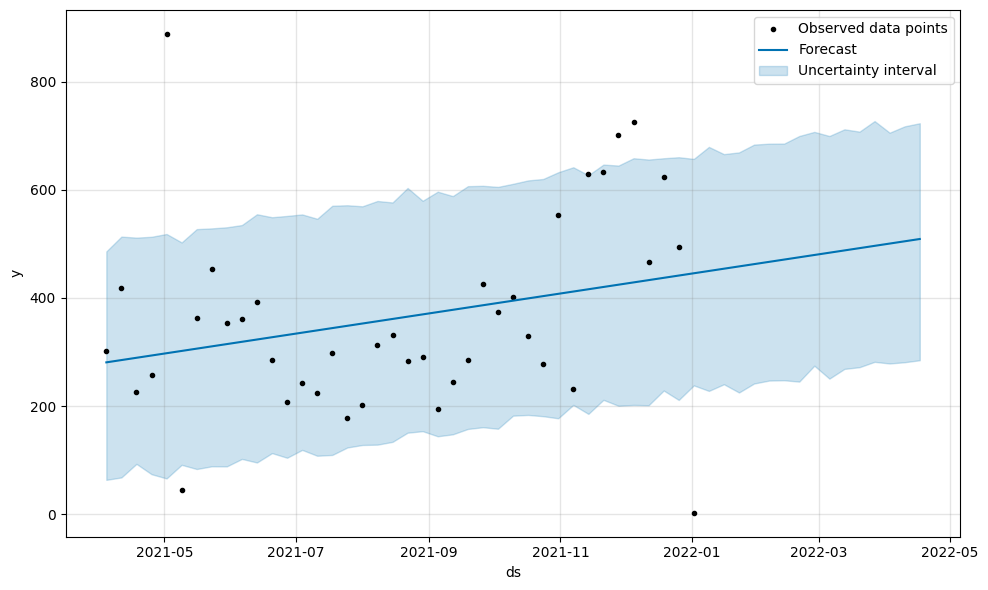

In [ ]:
fig2 = m3.plot(final6, uncertainty=True,include_legend=True)

In [ ]:
final7=final6[41:52]
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print(mean_squared_error(df3['y'], final7['yhat']) ) # MSE


print(mean_absolute_percentage_error(df3['y'], final7['yhat']))

44274.94149148409
1.0722382548319978


In [ ]:
s = r2_score(df3['y'],final7['yhat'])

In [ ]:
s

-2.641937302578783

In [ ]:
data99=pd.DataFrame()
data99=data[['REQ DATE','TYPE OF REQ']].copy()
data99 = data99.dropna()

In [ ]:
df2

,ds,y
0,2021-04-04,302
1,2021-04-11,418
2,2021-04-18,226
3,2021-04-25,257
4,2021-05-02,888
5,2021-05-09,45
6,2021-05-16,363
7,2021-05-23,454
8,2021-05-30,353
9,2021-06-06,361


In [ ]:
data99.sort_values(by='REQ DATE',inplace=True)

In [ ]:
data_group=data99.groupby(['REQ DATE','TYPE OF REQ']).size().reset_index(name='Total Orders')

In [ ]:
data_group

,REQ DATE,TYPE OF REQ,Total Orders
0,2020-12-04,New Development,1
1,2020-12-16,New Development,2
2,2020-12-19,New Development,1
3,2020-12-23,New Development,1
4,2020-12-25,New Development,1
...,...,...,...
1519,2022-03-28,Planned Revalidation,3
1520,2022-03-28,Revalidation,11
1521,2022-03-29,New Development,1
1522,2022-03-29,Revalidation,2


In [ ]:
df2=data_group.groupby(pd.Grouper(key='REQ DATE',axis=0,
                      freq='W')).sum()
df2.reset_index(inplace=True)

C:\Users\intern_asharma\AppData\Local\Temp\ipykernel_2272\4267234683.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=data_group.groupby(pd.Grouper(key='REQ DATE',axis=0,


In [ ]:
df2 = data_group.groupby(['TYPE OF REQ', pd.Grouper(key='REQ DATE', freq='W')])['Total Orders'].sum().reset_index().sort_values('REQ DATE')

In [ ]:
df2

,TYPE OF REQ,REQ DATE,Total Orders
252,New Development,2020-12-06,1
253,New Development,2020-12-20,3
254,New Development,2020-12-27,2
255,New Development,2021-01-17,4
405,Revalidation,2021-01-17,1
...,...,...,...
201,Line Problem,2022-04-03,1
401,Planned Revalidation,2022-04-03,3
317,New Development,2022-04-03,1
112,Developmental Problem,2022-04-03,1


<Axes: title={'center': 'TYPE OF REQ VS TIME'}, xlabel='REQ DATE', ylabel='Total Orders'>

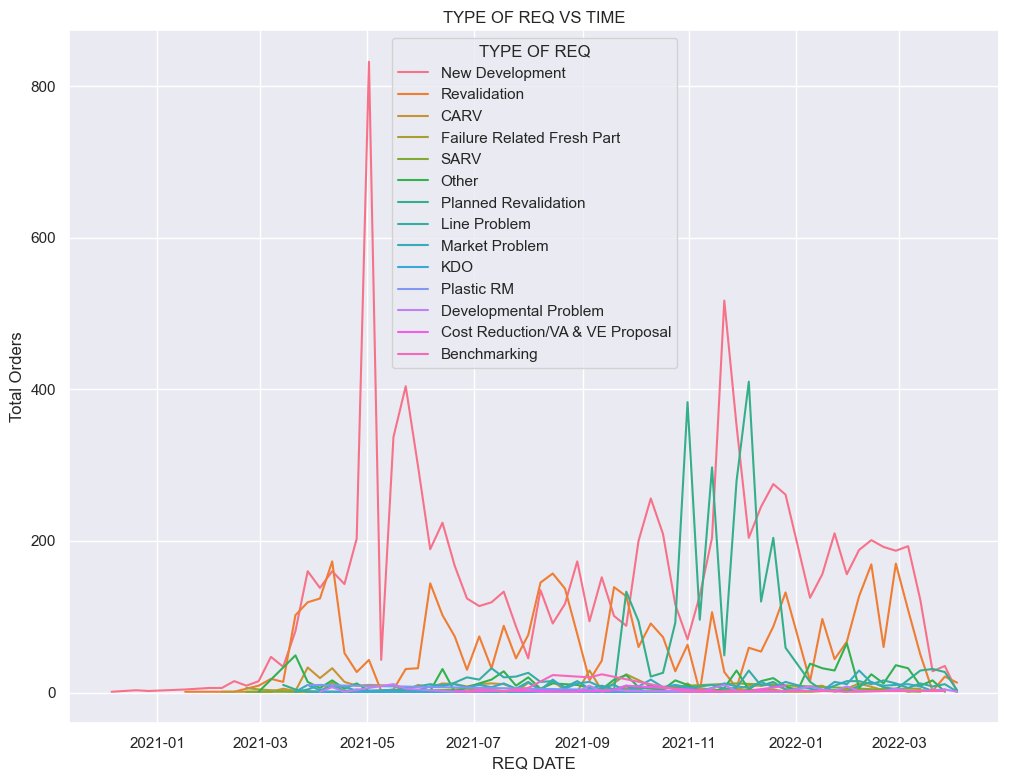

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,9)})
plt.title('TYPE OF REQ VS TIME')
sns.lineplot(data=df2, x="REQ DATE", y="Total Orders", hue="TYPE OF REQ")


EXTRA

In [ ]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [ ]:
train_df2 = data5.copy().set_index("ds")

In [ ]:
train_df2["y"], lambda_prophet = stats.boxcox(train_df2["y"])
train_df2.reset_index(inplace=True)

In [ ]:

final21 = pd.DataFrame(columns=['ds', 'yhat'])
m4 = Prophet()
    # m.add_seasonality(name='weekly_sat', period=7,
    #                   fourier_order=5, condition_name='is_sat')
    # m.add_seasonality(name='weekly_sun', period=7,
    #                   fourier_order=5, condition_name='is_sun')
    #add_regressor(m, name, prior.scale = NULL, standardize = "auto", mode = NULL)
    #df['is_sat'] = (pd.DatetimeIndex(df['ds']).dayofweek == 2).astype(int)
    #df['is_sun'] = (pd.DatetimeIndex(df['ds']).dayofweek == 3).astype(int)
m4.fit(train_df2)
future6 = m4.make_future_dataframe(periods=100)
    # future['is_sat'] = bool('')
    # future['is_sun'] = bool('')
forecast6 = m4.predict(future6)


final21 = pd.concat([final21, forecast6], ignore_index=True)
    # print(forecast.tail())
final22 = final21[[ 'ds', 'yhat', 'yhat_lower', 'yhat_upper']]
final22[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

18:18:38 - cmdstanpy - INFO - Chain [1] start processing
18:18:38 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2021-03-31,9.892576,5.774417,13.909535
1,2021-04-01,9.814763,6.110336,13.755169
2,2021-04-02,8.359493,4.410779,12.013523
3,2021-04-03,5.831689,2.049498,9.480230
4,2021-04-05,9.307539,5.451314,13.098902
5,2021-04-06,9.830918,5.997953,13.450175
6,2021-04-07,9.817487,5.963921,13.652506
7,2021-04-08,9.739674,5.748113,13.854618
8,2021-04-09,8.284404,4.669107,11.909320
9,2021-04-10,5.756600,2.067467,9.450805


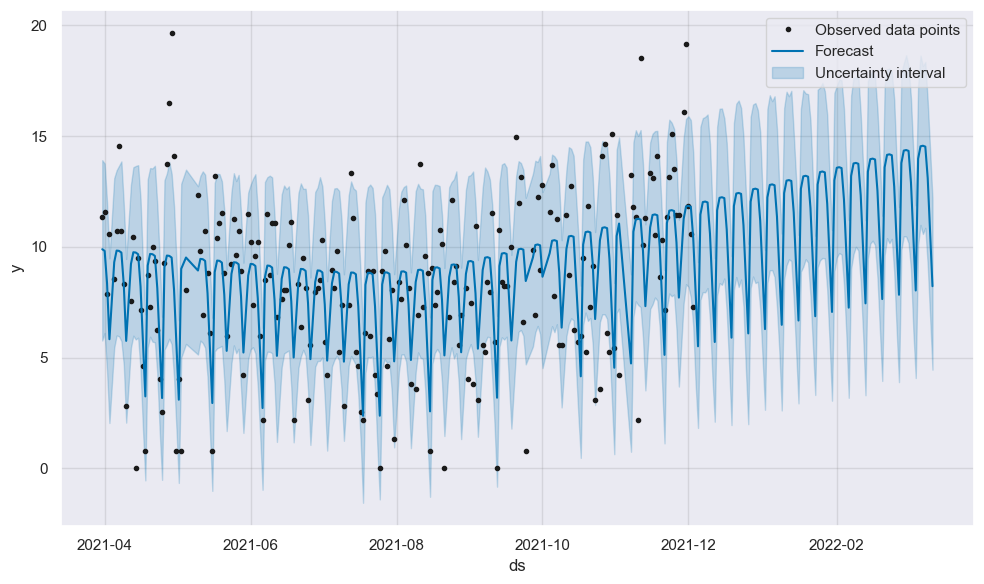

In [ ]:
fig1 = m4.plot(final22, uncertainty=True,include_legend=True)

In [ ]:
for column in final22[["yhat", "yhat_lower", "yhat_upper"]]:
    final22[column] = inverse_boxcox(final22[column], lambda_prophet)

C:\Users\intern_asharma\AppData\Local\Temp\ipykernel_2272\1073087580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final22[column] = inverse_boxcox(final22[column], lambda_prophet)


In [ ]:
final22

,ds,yhat,yhat_lower,yhat_upper
0,2021-03-31,66.482842,22.473359,142.063762
1,2021-04-01,65.362798,24.995252,138.470313
2,2021-04-02,46.581176,13.910899,101.876037
3,2021-04-03,22.891290,4.626665,60.684551
4,2021-04-05,58.355533,20.206481,123.840306
...,...,...,...,...
309,2022-03-09,157.882541,76.923800,265.488907
310,2022-03-10,156.895072,81.362359,271.852731
311,2022-03-11,123.965792,56.870409,213.652051
312,2022-03-12,77.473696,31.171183,153.573706


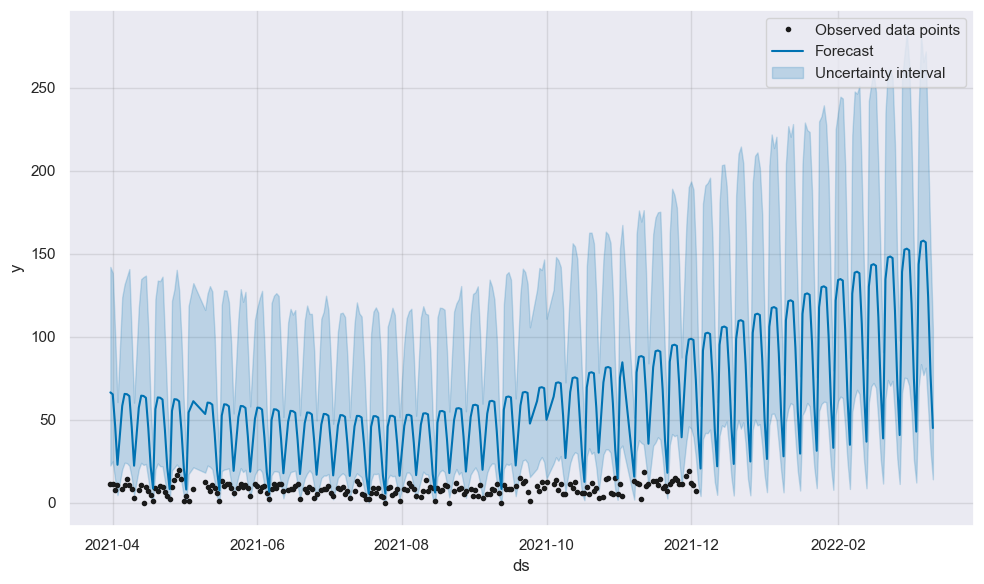

In [ ]:
fig1 = m4.plot(final22, uncertainty=True,include_legend=True)

,ds,y
0,2021-03-31,11.363359
1,2021-04-01,11.588134
2,2021-04-02,7.856037
3,2021-04-03,10.585574
4,2021-04-05,8.565752
...,...,...
209,2021-11-29,16.079830
210,2021-11-30,19.161268
211,2021-12-01,11.860697
212,2021-12-02,10.585574
